In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import learning_curve

In [10]:
df = pd.read_csv('/content/pca_transformed_data_25.csv')

In [12]:
df_train, df_temp = train_test_split(df, test_size=0.3, random_state=42)
df_val, df_test = train_test_split(df_temp, test_size=0.5, random_state=42)

In [13]:
print(f"Original dataframe size: {len(df)}")
print(f"Training set size: {len(df_train)}")
print(f"Validation set size: {len(df_val)}")
print(f"Testing set size: {len(df_test)}")

Original dataframe size: 50000
Training set size: 35000
Validation set size: 7500
Testing set size: 7500


In [14]:
param_grid_rf = {
    'n_estimators': [100],              # reasonable default
    'max_depth': [None, 20],            # shallow vs. full depth
    'min_samples_split': [2, 5],        # basic variation
    'min_samples_leaf': [1, 2],         # smaller range
}


In [15]:
random_forest = RandomForestClassifier(random_state=42)

# Create GridSearchCV object for Random Forest
grid_search_rf = GridSearchCV(estimator=random_forest,
                              param_grid=param_grid_rf,
                              cv=5,
                              scoring='accuracy',
                              n_jobs=-1,
                              verbose=2)


In [16]:
# Fit GridSearchCV to the training data
grid_search_rf.fit(df_train.drop('Test Results', axis=1), df_train['Test Results'])

# Print the best parameters and best score
print("Best parameters for Random Forest:", grid_search_rf.best_params_)
print("Best cross-validation accuracy for Random Forest:", grid_search_rf.best_score_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters for Random Forest: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation accuracy for Random Forest: 0.8181714285714285


In [17]:
import pandas as pd
from sklearn.metrics import classification_report, accuracy_score

# Get the best Random Forest model from GridSearchCV
best_rf_model = grid_search_rf.best_estimator_

# Make predictions on the test set
y_pred_test_rf = best_rf_model.predict(df_test.drop('Test Results', axis=1))
y_true_test_rf = df_test['Test Results']

# Get the classification report as a dictionary
report_rf = classification_report(y_true_test_rf, y_pred_test_rf, output_dict=True)

# Extract the desired metrics (weighted averages)
precision_rf = report_rf['weighted avg']['precision']
sensitivity_rf = report_rf['weighted avg']['recall']  # Recall is sensitivity
f1_score_rf = report_rf['weighted avg']['f1-score']
accuracy_rf = accuracy_score(y_true_test_rf, y_pred_test_rf)

# Create a dictionary to store the metrics
metrics_data_rf = {
    'Metric': ['Precision', 'Sensitivity', 'F1 Score', 'Accuracy'],
    'Value': [precision_rf, sensitivity_rf, f1_score_rf, accuracy_rf]
}

# Create a pandas DataFrame
metrics_df_rf = pd.DataFrame(metrics_data_rf)

# Display the DataFrame
print("Performance Metrics for Random Forest on Test Set:")
display(metrics_df_rf)

Performance Metrics for Random Forest on Test Set:


,Metric,Value
0,Precision,0.815280
1,Sensitivity,0.815333
2,F1 Score,0.815282
3,Accuracy,0.815333


In [18]:
print(accuracy_score(y_true_test_rf, y_pred_test_rf))

0.8153333333333334


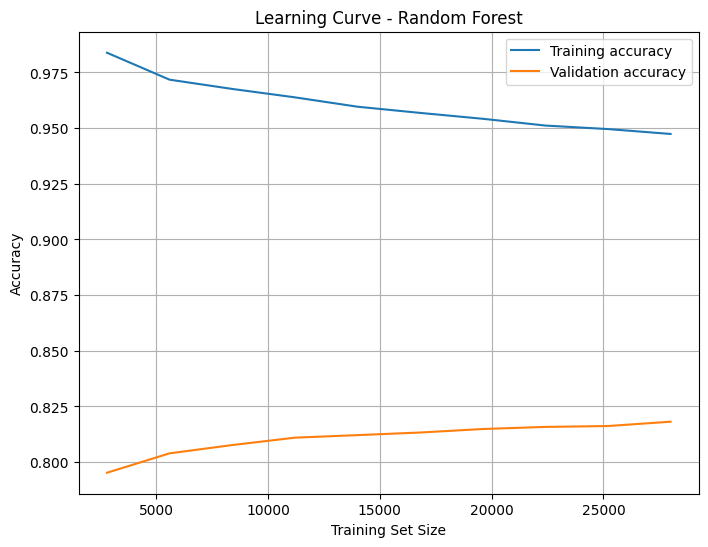

In [22]:
train_sizes, train_scores, test_scores = learning_curve(
    grid_search_rf.best_estimator_, df_train.drop('Test Results', axis=1), df_train['Test Results'],
    cv=5, scoring='accuracy', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10), random_state=42
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, label="Training accuracy")
plt.plot(train_sizes, test_scores_mean, label="Validation accuracy")
plt.title("Learning Curve - Random Forest")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid(True)
plt.show()

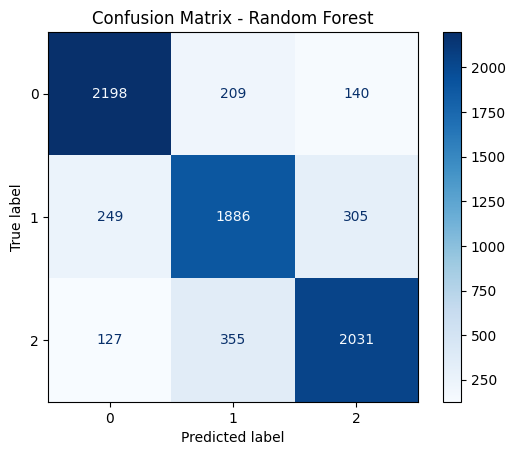

In [23]:
cm_rf = confusion_matrix(y_true_test_rf, y_pred_test_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.show()